.. meta::
   :description: Generalized Differential Evolution 3 (GDE3) is one of the most popular multi-objective variants of DE. It incorporates the Rank and Crowding survival selection of NSGA-II to a basic DE algorithm.

.. meta::
   :keywords: Differential Evolution, DE,  Multi-modal Optimization, Nature-inspired Algorithm, Multi-objective Optimization, Python

# GDE3: Generalized Differential Evolution 3

Differential evolution <cite data-cite="de_article"></cite>, originally designed for single-objective optimization, has been modified in different ways to solve multi-objective problems. GDE3 <cite data-cite="gde3"></cite> is one of the most popular multi-objective variants of DE. It incorporates the [Rank and Crowding](./../../operators/survival.ipynb) survival selection of NSGA-II <cite data-cite="nsga2"></cite> to a basic DE algorithm. Differently from other multi-objective variants of DE, GDE3 has a one-to-one comparison between each member in the parent population $x_i$ and its corresponding trial vector $u_i$ before truncating the population into the original size. In this one-to-one comparison, one of the individuals of each pair might be removed in advance from the combined population before (*µ*+*λ*) survival if dominated by the other.

Other variants of GDE3 that slghtly modify the Rank and Crowding mechanisms are also included:
- GDE3-MNN <cite data-cite="gde3many"></cite> (class `GDE3MNN`)
- GDE3 with improved pruning of non-dominated solutions in bi-objective problems <cite data-cite="gde3pruning"></cite> (class `GDE3P`)

### Bi-objective example

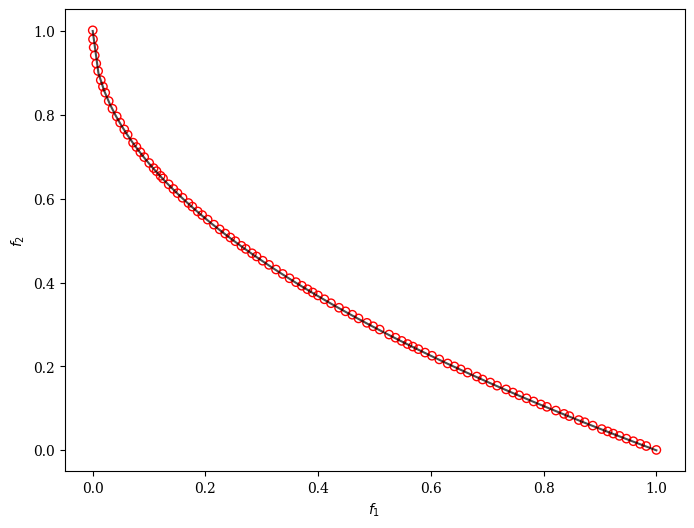

In [3]:
from pymoo.algorithms.moo.gde3 import GDE3, GDE3P, GDE3MNN
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = GDE3P(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

### Three-objective example

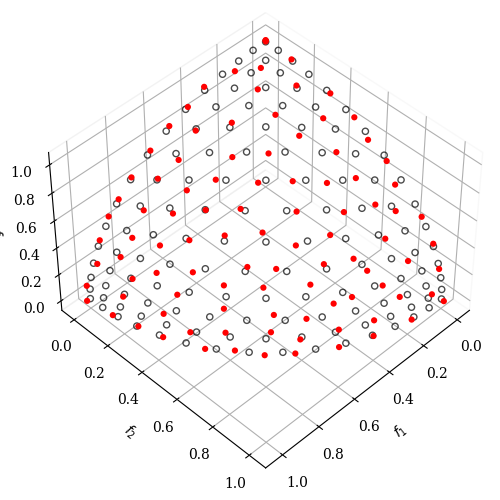

In [4]:
problem = get_problem("dtlz2")

algorithm = GDE3MNN(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), facecolor="none", edgecolor="black", alpha=0.7)
plot.add(res.F, facecolor="red", edgecolor="none")
plot.show()

### API